# Titanic: Machine Learning from Disaster
目标：利用给定数据，预测是否 Survived

参考：https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic

## 加载数据
之前为了便于处理，将所有数据合并起来放在 full 中，在测试时分开，提交后得分 0.00000。

在这里不将数据合并，每一次都单独处理 train 和 test。

In [1]:
import pandas as pd

train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

print train_df.shape,test_df.shape  # 查看数据大小
train_df.head()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print train_df.info()
print '='*25
print test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

## 特征工程
### Name
从上面的信息可以知道，Name 是没有缺失的。
截取 Name 中的 Mr, Miss 等 Title，作为一列新的特征。

In [3]:
import re

def getTitle(names):
    titles = []
    for name in names:
        titles += re.findall(r', (\S+). ', name)
    return titles

train_df['Title']=getTitle(train_df['Name'])
test_df['Title']=getTitle(test_df['Name'])

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


观察各个 Title 的人数，对人数少的做处理。

为了处理的结果更准确，将 Title 和 Sex 联系起来。

In [4]:
# 查看一共有哪些 Title
print set(train_df['Title'])
print set(test_df['Title'])

set(['Sir', 'Major', 'Don', 'th', 'Mlle', 'Capt', 'Dr', 'Lady', 'Rev', 'Mrs', 'Jonkheer', 'Master', 'Ms', 'Mr', 'Mme', 'Miss', 'Col'])
set(['Dr', 'Rev', 'Mrs', 'Dona', 'Master', 'Ms', 'Mr', 'Miss', 'Col'])


In [5]:
print train_df.groupby(['Title','Sex']).size()
print '='*25
print test_df.groupby(['Title','Sex']).size()

Title     Sex   
Capt      male        1
Col       male        2
Don       male        1
Dr        female      1
          male        6
Jonkheer  male        1
Lady      female      1
Major     male        2
Master    male       40
Miss      female    182
Mlle      female      2
Mme       female      1
Mr        male      517
Mrs       female    125
Ms        female      1
Rev       male        6
Sir       male        1
th        female      1
dtype: int64
Title   Sex   
Col     male        2
Dona    female      1
Dr      male        1
Master  male       21
Miss    female     78
Mr      male      240
Mrs     female     72
Ms      female      1
Rev     male        2
dtype: int64


In [6]:
# 将人数少的 Title 统称为 rare_title
rare_title=['Don', 'Dona', 'Lady', 'th','Capt', 'Col', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
for k in rare_title:
    train_df.loc[train_df['Title']==k,'Title']='raratitle'
    test_df.loc[test_df['Title']==k,'Title']='raratitle' 


# 修正 mlle, ms, mme
train_df.loc[train_df['Title']=='Mlle','Title']='Miss' #将Mlleg改为Miss
train_df.loc[train_df['Title']=='Ms','Title']='Miss' 
train_df.loc[train_df['Title']=='Mme','Title']='Mrs' 

test_df.loc[test_df['Title']=='Mlle','Title']='Miss' #将Mlleg改为Miss
test_df.loc[test_df['Title']=='Ms','Title']='Miss' 
test_df.loc[test_df['Title']=='Mme','Title']='Mrs' 

print train_df.groupby(['Title','Sex']).size()
print '='*25
print test_df.groupby(['Title','Sex']).size()

Title      Sex   
Master     male       40
Miss       female    185
Mr         male      517
Mrs        female    126
raratitle  female      3
           male       20
dtype: int64
Title      Sex   
Master     male       21
Miss       female     79
Mr         male      240
Mrs        female     72
raratitle  female      1
           male        5
dtype: int64


### Fimaly
关注家庭成员情况，家人是一起 survive 了还是没有。根据 SibSp 和 Parch 来计算家庭成员人数。

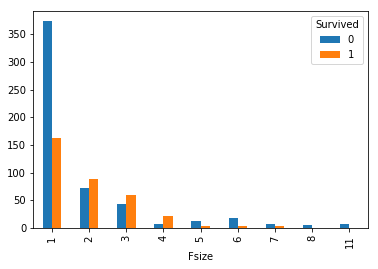

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline

train_df['Fsize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Fsize'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df.groupby(['Fsize', 'Survived']).size().unstack().plot.bar() # 观察 Fsize 与 Survive 的关系

In [8]:
# 根据上图，将famly size分为离散化（Discretize）：singleton, small, large
train_df.loc[train_df['Fsize']==1,'FsizeD']='singleton'
train_df.loc[(train_df['Fsize']>1) & (train_df['Fsize']<5) ,'FsizeD']='small'
train_df.loc[train_df['Fsize']>=5,'FsizeD']='large'

test_df.loc[test_df['Fsize']==1,'FsizeD']='singleton'
test_df.loc[(test_df['Fsize']>1) & (test_df['Fsize']<5) ,'FsizeD']='small'
test_df.loc[test_df['Fsize']>=5,'FsizeD']='large'

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,FsizeD
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,singleton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,singleton


## 处理缺失数据

In [9]:
# 检查哪些数据有缺失
def is_nan(d):
    return sum(d.isnull())

print train_df.apply(is_nan)
print '='*25
print test_df.apply(is_nan)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Fsize            0
FsizeD           0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
Fsize            0
FsizeD           0
dtype: int64


### Embarked

In [10]:
# train 的 Embarked 有两个缺失值
train_df['Embarked']=train_df['Embarked'].fillna('C')
sum(train_df['Embarked'].isnull())

0

### Fare

In [11]:
# test 的 Fare 有一个缺失值，用众数填充
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
sum(test_df['Fare'].isnull())

0

### Age

In [12]:
# Age 的缺失值有很多，需要通过预测来填充
# 直接使用 mean 或 median 会造成比较大的偏差
# 在这里随机生成 Age，生成的 Age 范围为 [average - std, average + std]
import numpy as np
train_average_age   = train_df["Age"].mean()
train_std_age       = train_df["Age"].std()
train_count_nan_age = train_df["Age"].isnull().sum() #缺失值的个数
rand_1 = np.random.randint(train_average_age - train_std_age, train_average_age + train_std_age, size = train_count_nan_age)
train_df.loc[train_df['Age'].isnull(),'Age']=rand_1
print len(rand_1),sum(train_df['Age'].isnull())

test_average_age   = test_df["Age"].mean()
test_std_age       = test_df["Age"].std()
test_count_nan_age = test_df["Age"].isnull().sum() #缺失值的个数
rand_2 = np.random.randint(test_average_age - test_std_age, test_average_age + test_std_age, size = test_count_nan_age)
test_df.loc[test_df['Age'].isnull(),'Age']=rand_2
print len(rand_2),sum(test_df['Age'].isnull())

177 0
86 0


## 第二轮特征工程
现在已经知道了 Age，利用 Age 来创建两个新的列：isChild，hasChild

Child：年龄在 18 以下为 Child，18及以上为 Adult

Mother：Age>18，Parch>0，Title！=‘Miss’

In [13]:
# 增加一列 isChild
train_df.loc[train_df['Age'] < 18, 'isChild'] = 1
train_df.loc[train_df['Age'] >= 18, 'isChild'] = 0

test_df.loc[test_df['Age'] < 18, 'isChild'] = 1
test_df.loc[test_df['Age'] >= 18, 'isChild'] = 0

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,FsizeD,isChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,small,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,small,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,singleton,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,small,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,singleton,0.0


In [14]:
# 增加一列 hasChild
train_df['hasChild'] = 0
train_df.loc[(train_df['Age'] > 18) & (train_df['Parch'] > 0) & (train_df['Title'] != 'Miss'), 'hasChild'] = 1

test_df['hasChild'] = 0
test_df.loc[(test_df['Age'] > 18) & (test_df['Parch'] > 0) & (test_df['Title'] != 'Miss'), 'hasChild'] = 1

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,FsizeD,isChild,hasChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,small,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,small,0.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,singleton,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,small,0.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,singleton,0.0,0


In [15]:
# 在预测之前，检查一下还有没有缺失值
print train_df.apply(is_nan)
print '='*25
print test_df.apply(is_nan)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Fsize            0
FsizeD           0
isChild          0
hasChild         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Fsize            0
FsizeD           0
isChild          0
hasChild         0
dtype: int64


由上述信息可知，除了 Cabin，没有缺失值。下面将字符串转为数值

In [16]:
def formatData(data):
    data.loc[data['Sex']=='male','Sex']=1
    data.loc[data['Sex']=='female','Sex']=0
    data.loc[data['Embarked']=='S','Embarked']=0
    data.loc[data['Embarked']=='C','Embarked']=1
    data.loc[data['Embarked']=='Q','Embarked']=2
    data.loc[data['Title']=='Master','Title']=1
    data.loc[data['Title']=='Miss','Title']=2
    data.loc[data['Title']=='Mr','Title']=3
    data.loc[data['Title']=='Mrs','Title']=4
    data.loc[data['Title']=='raratitle','Title']=5
    data.loc[data['FsizeD']=='singleton','FsizeD']=1
    data.loc[data['FsizeD']=='small','FsizeD']=2
    data.loc[data['FsizeD']=='large','FsizeD']=3
    return data

train_df=formatData(train_df)
test_df=formatData(test_df)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,FsizeD,isChild,hasChild
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,3,2,2,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,4,2,2,0.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,1,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,4,2,2,0.0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,3,1,1,0.0,0


## 预测

In [17]:
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Title', 'FsizeD']

X = train_df[features]
y = train_df['Survived']

X_test = test_df[features]

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X, y)
print clf.score(X, y)

prediction = clf.predict(X_test)  # 预测

0.977553310887


In [19]:
results=pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': prediction})

results.to_csv('submission_2.csv',index=False)

## 总结
提交后，score：0.76555

如果features 加上 hasChild，score：0.76077

如果features 加上 hasChild，n_estimators=100，score：0.75598

如果features 加上 isChild 和 hasChild，score：0.75120

—— 后面过拟合程度加重，在这里保留分数最高的 features。